1)	The Iris dataset is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width). Use SVC from sklearn.svm on the Iris dataset and follow the steps below:
a)	Load the dataset and perform train–test split (80:20).


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 120
Testing samples: 30


b) Train on the given 3 kernels Linear, Polynomial (degree=3), RBF

c)	Evaluate each model using:
*	Accuracy
*	Precision
*	Recall
*	F1-Score

In [2]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        model = SVC(kernel=kernel, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'y_pred': y_pred
    }
    
    print(f"\n{kernel.upper()} Kernel Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


LINEAR Kernel Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

POLY Kernel Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

RBF Kernel Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


d)	Display the confusion matrix for each kernel.

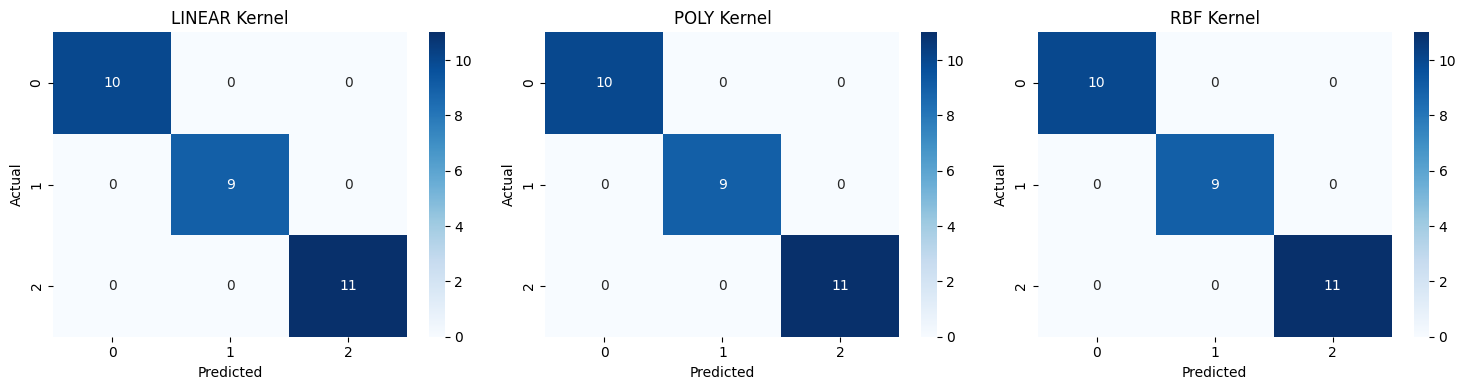

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, kernel in enumerate(kernels):
    cm = confusion_matrix(y_test, results[kernel]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{kernel.upper()} Kernel')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [4]:
print("\nComparison Summary:")
print("-" * 60)
for kernel in kernels:
    print(f"{kernel.upper():10} | Accuracy: {results[kernel]['accuracy']:.4f} | F1-Score: {results[kernel]['f1_score']:.4f}")

best_kernel = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest performing kernel: {best_kernel.upper()}")
print(f"Accuracy: {results[best_kernel]['accuracy']:.4f}")

print("\nReason:")
if best_kernel == 'linear':
    print("Linear kernel works well when data is linearly separable.")
elif best_kernel == 'rbf':
    print("RBF kernel can handle non-linear relationships and is effective for complex decision boundaries.")
else:
    print("Polynomial kernel captures polynomial relationships in the data.")


Comparison Summary:
------------------------------------------------------------
LINEAR     | Accuracy: 1.0000 | F1-Score: 1.0000
POLY       | Accuracy: 1.0000 | F1-Score: 1.0000
RBF        | Accuracy: 1.0000 | F1-Score: 1.0000

Best performing kernel: LINEAR
Accuracy: 1.0000

Reason:
Linear kernel works well when data is linearly separable.


2)	SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.

          A) Use the Breast Cancer dataset from sklearn.datasets.load_breast_cancer.
          B) Train an SVM (RBF kernel) model with and without feature scaling (StandardScaler). Compare both results using:
               •	Training accuracy
               •	Testing accuracy
          C) Discuss the effect of feature scaling on SVM performance.



In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Without Feature Scaling:")
svm_no_scaling = SVC(kernel='rbf', random_state=42)
svm_no_scaling.fit(X_train, y_train)

train_acc_no_scaling = svm_no_scaling.score(X_train, y_train)
test_acc_no_scaling = svm_no_scaling.score(X_test, y_test)

print(f"Training Accuracy: {train_acc_no_scaling:.4f}")
print(f"Testing Accuracy: {test_acc_no_scaling:.4f}")


print("With Feature Scaling:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_with_scaling = SVC(kernel='rbf', random_state=42)
svm_with_scaling.fit(X_train_scaled, y_train)

train_acc_with_scaling = svm_with_scaling.score(X_train_scaled, y_train)
test_acc_with_scaling = svm_with_scaling.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_acc_with_scaling:.4f}")
print(f"Testing Accuracy: {test_acc_with_scaling:.4f}")

Without Feature Scaling:
Training Accuracy: 0.9143
Testing Accuracy: 0.9474
With Feature Scaling:
Training Accuracy: 0.9890
Testing Accuracy: 0.9825


In [8]:
print("COMPARISON AND DISCUSSION")

print(f"\nAccuracy Improvement:")
print(f"Training: {train_acc_with_scaling - train_acc_no_scaling:+.4f}")
print(f"Testing:  {test_acc_with_scaling - test_acc_no_scaling:+.4f}")

print("\nEffect of Feature Scaling on SVM Performance:")
print("1. Without scaling, features with larger magnitudes dominate the")
print("   distance calculations in RBF kernel.")
print("\n2. StandardScaler normalizes all features to have mean=0 and std=1,")
print("   ensuring equal contribution from all features.")
print("\n3. RBF kernel uses Euclidean distance, making it highly sensitive")
print("   to feature scales.")
print("\n4. Feature scaling significantly improves model performance and")
print("   prevents bias toward high-magnitude features.")

if test_acc_with_scaling > test_acc_no_scaling:
    improvement_pct = ((test_acc_with_scaling - test_acc_no_scaling) / test_acc_no_scaling) * 100
    print(f"\n5. Scaling improved test accuracy by {improvement_pct:.2f}%")

COMPARISON AND DISCUSSION

Accuracy Improvement:
Training: +0.0747
Testing:  +0.0351

Effect of Feature Scaling on SVM Performance:
1. Without scaling, features with larger magnitudes dominate the
   distance calculations in RBF kernel.

2. StandardScaler normalizes all features to have mean=0 and std=1,
   ensuring equal contribution from all features.

3. RBF kernel uses Euclidean distance, making it highly sensitive
   to feature scales.

4. Feature scaling significantly improves model performance and
   prevents bias toward high-magnitude features.

5. Scaling improved test accuracy by 3.70%
